In [56]:
# importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# **Data Exploration**

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

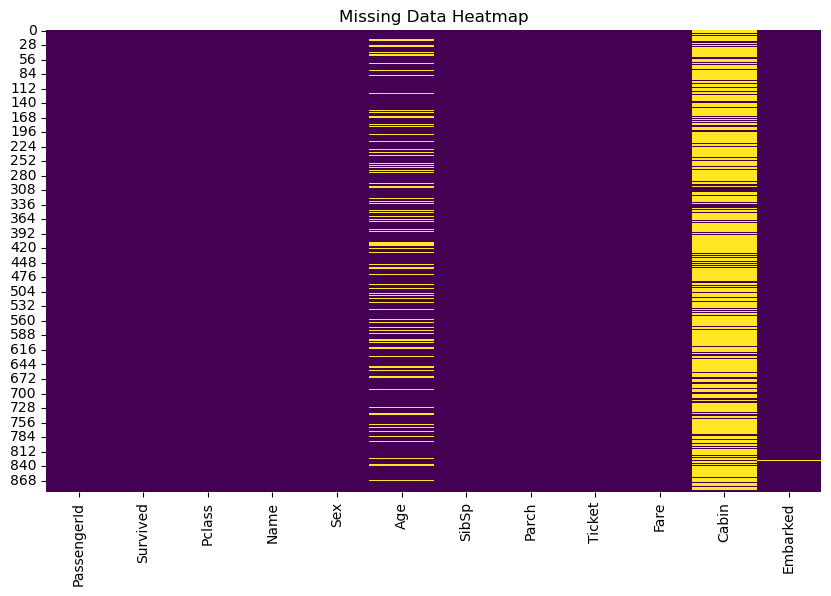

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [57]:
# loading the Titanic dataset
titanic_data = pd.read_csv("Titanic-Dataset.csv")

# displaying the first few rows of the dataset
print(titanic_data.head())

# checking for missing data numerically
missing_data_counts = titanic_data.isnull().sum()
print(missing_data_counts)

# creating a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# identifying categorical columns
categorical_columns = titanic_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


In [58]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [59]:
# did more women or men die on the Titanic?
gender_survival = titanic_data.groupby('Sex')['Survived'].value_counts(normalize = True)
print("Survival rate by gender:\n", gender_survival)

Survival rate by gender:
 Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


### __Observation:__

__Based on the data, women were more likely to survive than men.__

In [60]:
# which passenger class was more likely to survive?
class_survival = titanic_data.groupby('Pclass')['Survived'].value_counts(normalize = True)
print("Survival rate by passenger class:\n", class_survival)


Survival rate by passenger class:
 Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


### __Observation:__

__Based on the data, first-class passangers were more likely to survive__

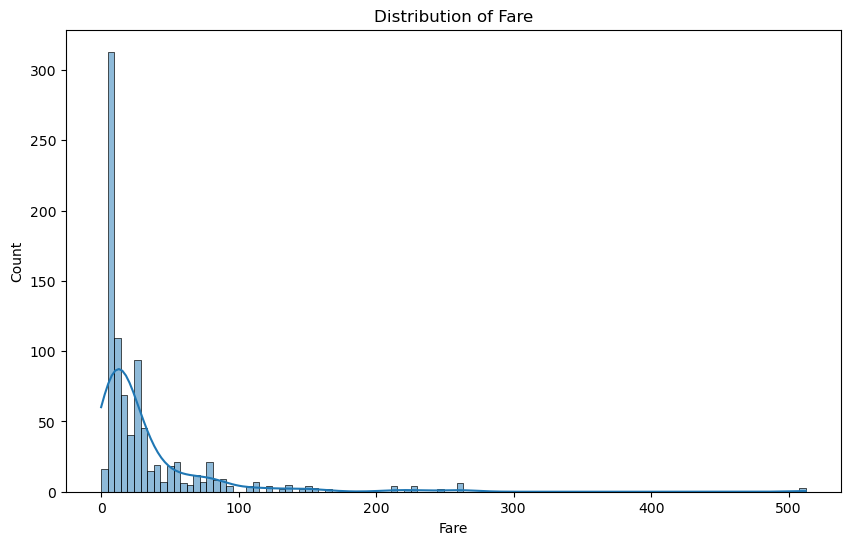

In [61]:
# what does the distribution of fare look like?
plt.figure(figsize = (10, 6))
sns.histplot(data = titanic_data, x = 'Fare', kde = True)
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

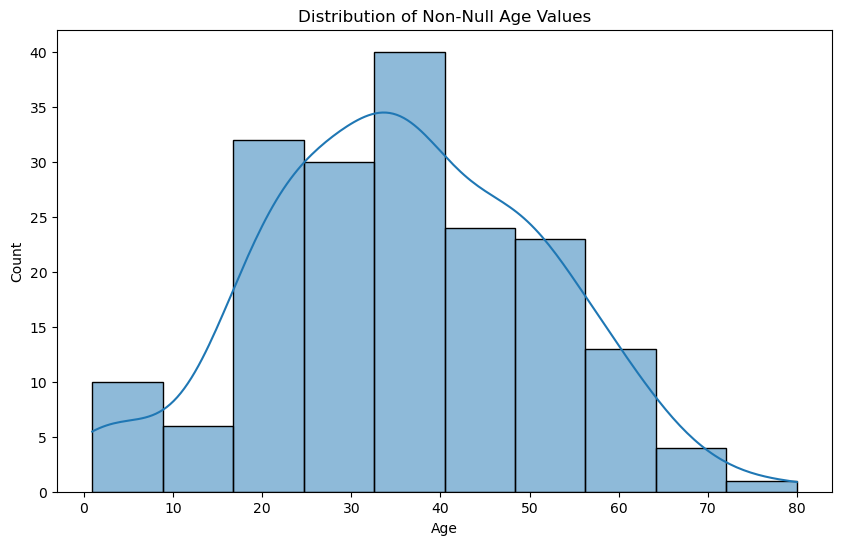

In [62]:
# what does the distribution of non-null age values look like?
plt.figure(figsize = (10, 6))
sns.histplot(data = titanic_data.dropna(), x = 'Age', kde = True)
plt.title("Distribution of Non-Null Age Values")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

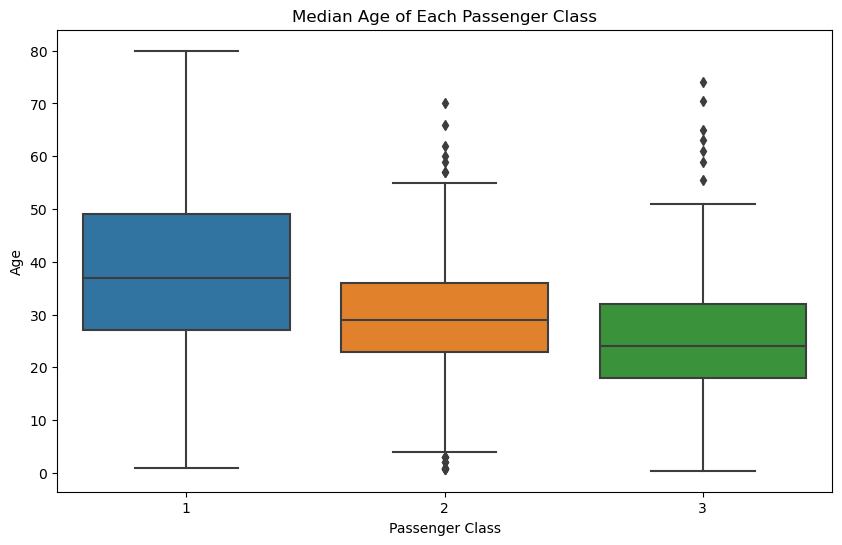

In [63]:
# median age of each passenger class in a box plot?
plt.figure(figsize = (10, 6))
sns.boxplot(data=titanic_data, x = 'Pclass', y = 'Age')
plt.title("Median Age of Each Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

# __Data Cleansing__

In [64]:
# loading the Titanic dataset and dropping the cabin column
titanic_data = pd.read_csv("Titanic-Dataset.csv")
print(titanic_data.head())

titanic_data.drop('Cabin', axis = 1, inplace = True)

# imputing age using the median of the passenger class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            # median age for class 1
            return 37
        elif pclass == 2:
            # median age for class 2
            return 29 
        else:
            # median age for class 3
            return 24 
    else:
        return age

# applying impute_age function
titanic_data['age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis = 1)

# dropping remaining rows with null values
titanic_data.dropna(inplace = True)

# checking for remaining null values
print(titanic_data.isnull().sum())

# converting categorical variables to numeric dummies
categorical_columns = ['Sex', 'Embarked']
titanic_dummies = pd.get_dummies(titanic_data, columns = categorical_columns, drop_first = True)

# dropping irrelevant columns
columns_to_drop = ['Name', 'Ticket', 'PassengerId'] #, 'Embarked'] - apparently 'Embarked is not in the data'
titanic_cleaned = titanic_dummies.drop(columns = columns_to_drop)

# creating feature set and label dataframe
X = titanic_cleaned.drop('Survived', axis = 1)
y = titanic_cleaned['Survived']

# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# printing the shape of the resulting datasets
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

# **Model Training**

### __Logistic Regression Model Building__

In [65]:
# applying impute_age function
titanic_data['age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis = 1)

# dropping remaining rows with null values
titanic_data.dropna(inplace = True)

# checking for remaining null values
print(titanic_data.isnull().sum())

# converting categorical variables to numeric dummies
categorical_columns = ['Sex', 'Embarked']
titanic_dummies = pd.get_dummies(titanic_data, columns = categorical_columns, drop_first = True)

# dropping irrelevant columns
columns_to_drop = ['Name', 'Ticket', 'PassengerId'] #, 'Embarked'] - apparently 'Embarked is not in the data'
titanic_cleaned = titanic_dummies.drop(columns = columns_to_drop)

X = titanic_cleaned.drop('Survived', axis = 1)
y = titanic_cleaned['Survived']

# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# implementing logistic regression
logreg = LogisticRegression(max_iter = 1000)
y_pred_logreg = cross_val_predict(logreg, X_train, y_train, cv = 5, method = 'predict_proba')
y_pred_logreg_class = np.argmax(y_pred_logreg, axis = 1)

print("LR Report:")
print(classification_report(y_train, y_pred_logreg_class))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_logreg_class))
print("ROC AUC Score:", roc_auc_score(y_train, y_pred_logreg[:, 1]))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
age            0
dtype: int64
LR Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       344
           1       0.75      0.73      0.74       225

    accuracy                           0.80       569
   macro avg       0.79      0.79      0.79       569
weighted avg       0.80      0.80      0.80       569

Confusion Matrix:
[[290  54]
 [ 61 164]]
ROC AUC Score: 0.8575452196382429


### __Support Vector Classifier__

In [66]:
# implementing support vector classifier
svc = SVC(probability=True)
y_pred_svc = cross_val_predict(svc, X_train, y_train, cv=5, method = 'predict_proba')
y_pred_svc_class = np.argmax(y_pred_svc, axis = 1)

print("SV Classifier Report:")
print(classification_report(y_train, y_pred_svc_class))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_svc_class))
print("ROC AUC Score:", roc_auc_score(y_train, y_pred_svc[:, 1]))

SV Classifier Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       344
           1       0.70      0.32      0.44       225

    accuracy                           0.68       569
   macro avg       0.69      0.62      0.61       569
weighted avg       0.68      0.68      0.64       569

Confusion Matrix:
[[313  31]
 [152  73]]
ROC AUC Score: 0.7228617571059431


### __SGD Classifier__

In [67]:
# implementing the SGD Classifier
sgd = SGDClassifier()
y_pred_sgd = cross_val_predict(sgd, X_train, y_train, cv = 5, method = 'decision_function')
y_pred_sgd_class = (y_pred_sgd > 0)

print("SGD Classifier Report:")
print(classification_report(y_train, y_pred_sgd_class))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_sgd_class))
print("ROC AUC Score:", roc_auc_score(y_train, y_pred_sgd_class))

SGD Classifier Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       344
           1       0.51      0.61      0.56       225

    accuracy                           0.62       569
   macro avg       0.61      0.62      0.61       569
weighted avg       0.63      0.62      0.62       569

Confusion Matrix:
[[214 130]
 [ 87 138]]
ROC AUC Score: 0.6177131782945737


### __Visualization__

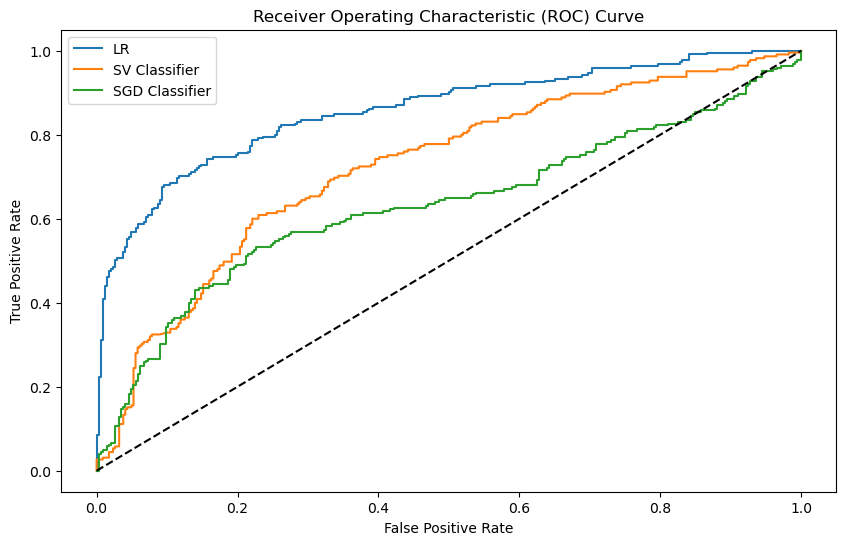

In [68]:
# visualzing the classification reports
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_train, y_pred_logreg[:, 1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, y_pred_svc[:, 1])
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_pred_sgd)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label = "LR")
plt.plot(fpr_svc, tpr_svc, label = "SV Classifier")
plt.plot(fpr_sgd, tpr_sgd, label = "SGD Classifier")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# **Model Tuning**

### __Sklearn Pipeline__

In [69]:
# creating a pipeline
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC())
])

### __GridSearch of Pipeline Classifier__

In [70]:
# parameter grid for GS
param_grid = {
    'svc__kernel': ['rbf'],
    'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'svc__C': [1, 10, 50, 100, 200, 300]
}

# gs with cross-validation
grid_search = GridSearchCV(svc_pipeline, param_grid, cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)

# printing best estimator and its parameters
print("best estimator:", grid_search.best_estimator_)
print("best parameters:", grid_search.best_params_)
print("best score:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......svc__C=1, svc__gamma=0.0001, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=1, svc__gamma=0.0001, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=1, svc__gamma=0.0001, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=1, svc__gamma=0.0001, svc__kernel=rbf; total time=   0.0s
[CV] END .......svc__C=1, svc__gamma=0.0001, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END ........svc__C=1, svc__gamma=0.001, svc__kernel=rbf; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=0.01, svc__kernel=rbf; total time=   0.0s
[CV] END .........svc__C=1, svc__gamma=0.01, sv

### __Best Estimator__

In [71]:
# applying best estimator to test set
best_estimator = grid_search.best_estimator_
test_score = best_estimator.score(X_test, y_test)
print("Test Set Score:", test_score)

Test Set Score: 0.8251748251748252


### __Learning Curve__

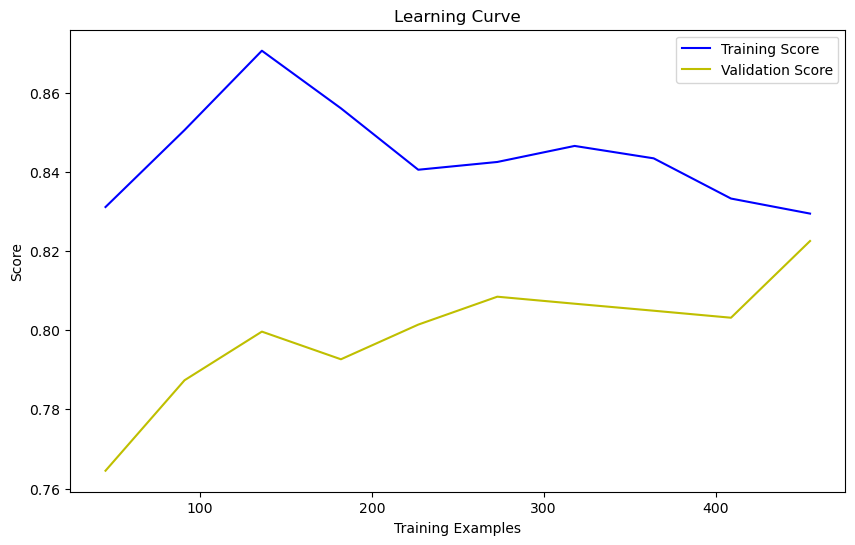

In [74]:
# creating learning curve using best estimator
train_sizes, train_scores, test_scores = learning_curve(
    best_estimator, X_train, y_train, cv = 5, train_sizes = np.linspace(0.1, 1.0, 10), scoring = 'accuracy'
)

# displaying the curve
plt.figure(figsize = (10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis = 1), 'b-')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), 'y-')
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(['Training Score', 'Validation Score'])
plt.show() 